In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# def bland_altman_plot(data1, data2, title="", log=True, *args, **kwargs):
#     data1     = np.asarray(data1)
#     data2     = np.asarray(data2)
#     mean      = np.mean([data1, data2], axis=0)
#     diff      = data1 - data2                   # Difference between data1 and data2
#     md        = np.mean(diff)                   # Mean of the difference
#     sd        = np.std(diff, axis=0)            # Standard deviation of the difference

#     plt.figure(figsize=(8,5))
#     plt.title('Bland-Altman Plot', fontsize=20)
#     plt.ylabel("Difference", fontsize=18)
#     plt.xlabel("Means", fontsize=18)
#     plt.scatter(mean, diff)
#     plt.axhline(md,           color='gray', linestyle='--')
#     plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
#     plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

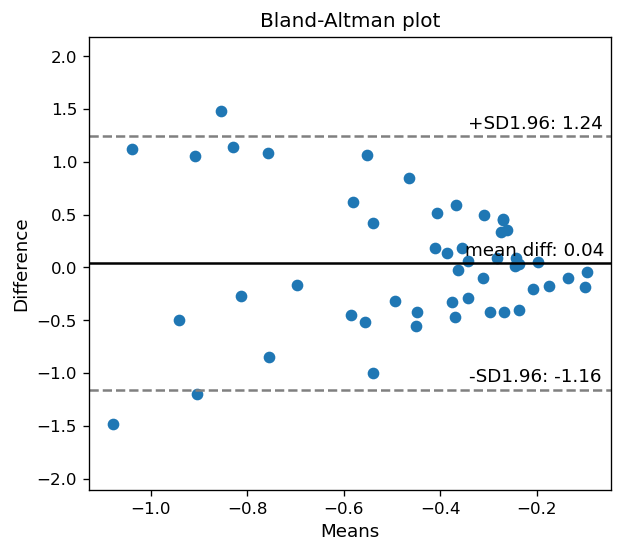

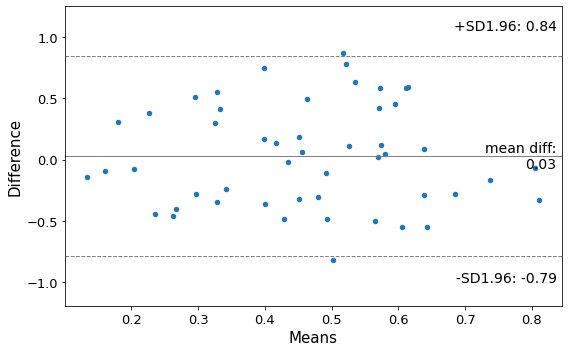

In [184]:
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
ax.set_xlabel('$x_{my text}$')

    
def bland_altman_plot(data1, data2,title="Bland-Altman plot", log=10, save_name = "" , *args, **kwargs):
    fontsize = 11
    dpi = 120
    linewidths = 1
    
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    
    if log==2:
        epsilon = 1e-5
        data1 = np.log2(data1+epsilon)
        data2 = np.log2(data2+epsilon)
    elif log==10:
        epsilon = 1e-5
        data1 = np.log10(data1+epsilon)
        data2 = np.log10(data2+epsilon)
        
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd
    params = {'mathtext.default': 'regular' } 
    plt.rcParams.update(params)
    
    plt.figure(figsize=(6,5), dpi=dpi)
    plt.scatter(mean, diff, *args, **kwargs, linewidths=linewidths)
    plt.axhline(md,           color='black', linestyle='-')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    
    #plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$", fontsize=13)
    plt.title(title, fontsize=fontsize+1)
    plt.xlabel("Means", fontsize=fontsize)
    plt.ylabel("Difference", fontsize=fontsize)
    plt.ylim(md - 3.5*sd, md + 3.5*sd)

    xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*0.89

    plt.text(xOutPlot, md - 1.76*sd, 
        r'-SD1.96: ' +  "%.2f" % CI_low, 
        ha = "center",
        va = "center",
        fontsize=fontsize)
    plt.text(xOutPlot, md + 2.16*sd, 
        r'+SD1.96: ' + "%.2f" % CI_high, 
        ha = "center",
        va = "center",
        fontsize=fontsize)
    plt.text(xOutPlot, md + 0.20*sd, 
        r'mean diff: ' + "%.2f" % md, 
        ha = "center",
        va = "center",
        fontsize=fontsize)
    plt.subplots_adjust(right=0.85)
    if save_name:
        plt.savefig(save_name+'.png')
    plt.show()

    return md, sd, mean, CI_low, CI_high

np.random.seed(9999)
m1 = np.random.random(50)
m2 = np.random.random(50)
bland_altman_plot(m1, m2)
plt.show()

# Seed the random number generator.
# This ensures that the results below are reproducible.
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(m1, m2, ax = ax)
plt.show()



# PROSPECT

Index(['MRN', 'MTV_0.5', 'TLG_0.5', 'MTV_1.5', 'TLG_1.5', 'MTV_2.5', 'TLG_2.5',
       'MTV_3.5', 'TLG_3.5', 'SUV_max', 'SUV_mean', 'Tumor_pix', 'Tumor_vol'],
      dtype='object')


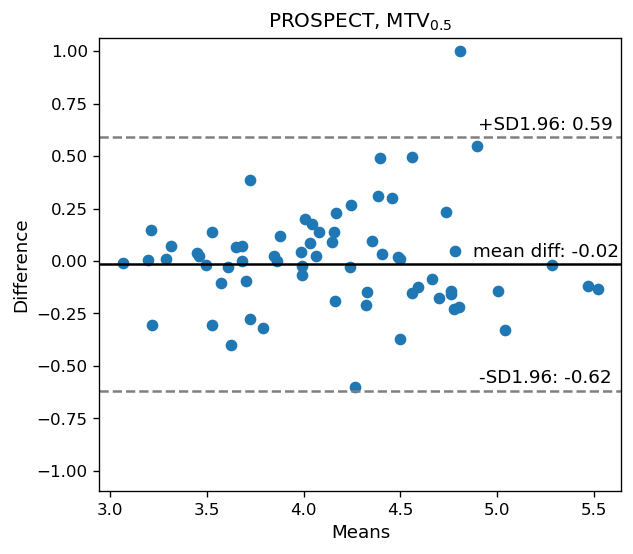

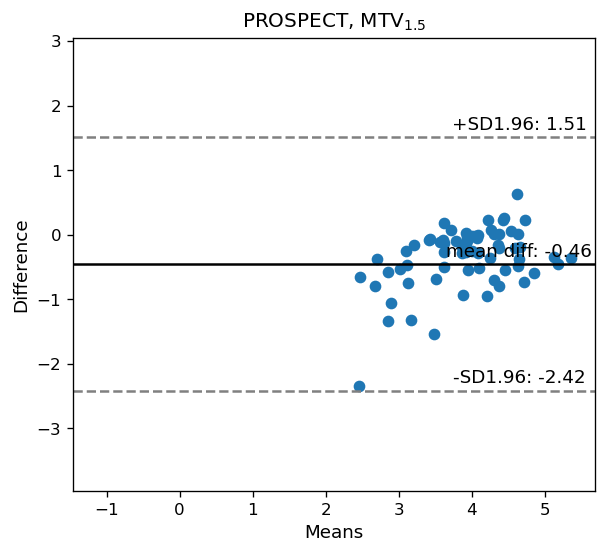

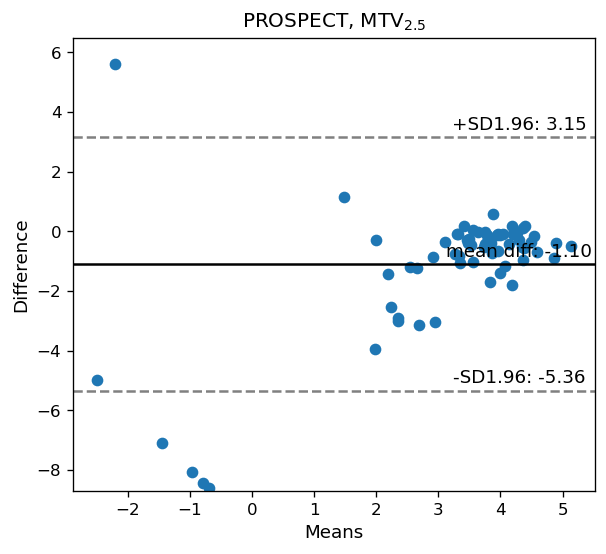

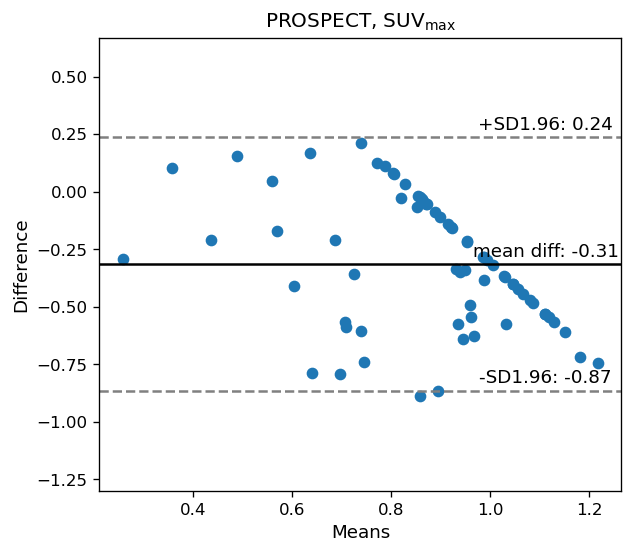

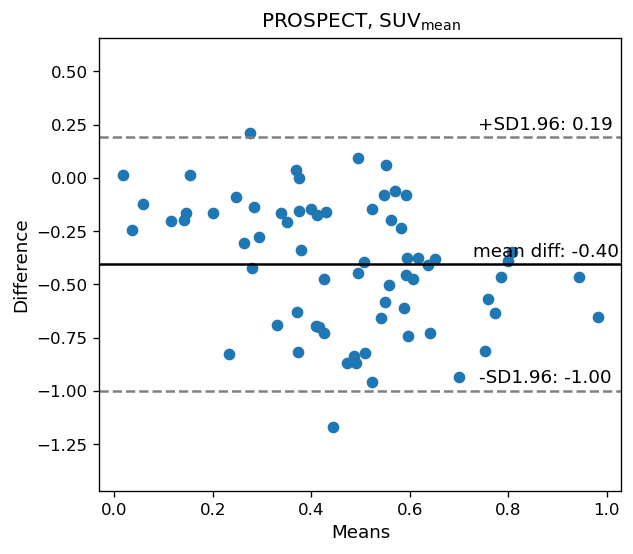

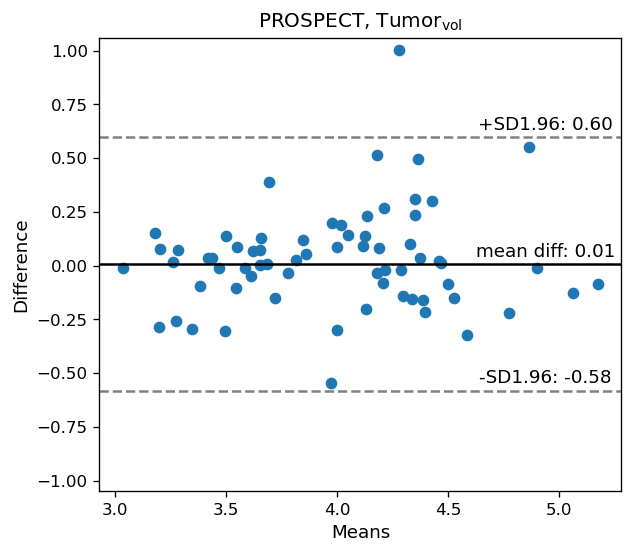

(0.006512583116738942,
 0.30107286797358546,
 array([4.125344  , 4.38584993, 3.1962599 , 3.77988015, 4.33869669,
        4.01686944, 3.61286255, 3.3459013 , 4.46636382, 4.28998356,
        3.84506706, 4.77494086, 3.6510136 , 3.49435727, 3.85832016,
        3.68456147, 4.2143793 , 4.42706748, 4.13704778, 3.49778715,
        4.18827455, 3.72075142, 3.69308496, 4.37595809, 4.50048683,
        3.81658145, 3.18077266, 3.42372787, 4.58655385, 3.97500427,
        4.00147858, 4.90130576, 3.46938026, 3.3831706 , 3.26126053,
        4.35293598, 3.61976801, 4.3664957 , 4.35138773, 3.20206753,
        4.28090039, 3.27357749, 3.28228559, 3.55017767, 4.00103254,
        3.41886798, 4.52829037, 4.04962948, 4.12947126, 4.18181667,
        4.29853749, 3.65201212, 3.54248688, 3.97325701, 4.20520124,
        5.06518492, 3.58548613, 4.11695909, 4.17892817, 3.4345497 ,
        4.21360914, 3.65705648, 4.32872141, 4.39672678, 4.4590154 ,
        5.1746841 , 3.03613448, 4.86541679]),
 -0.5835902381114885,
 0.

In [185]:
gt = pd.read_csv('E:/papers/CT2PET/Survival/PROSPECT_True_MTV_TLG_pall.csv')
pr = pd.read_csv('E:/papers/CT2PET/Survival/PROSPECT_Pred_MTV_TLG_pall.csv')
gt.sort_values('MRN')
pr.sort_values('MRN')
print(gt.columns)

name = "PROSPECT, "
title = 'MTV_0.5'
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$MTV_{0.5}$',save_name=name+title)


title = "MTV_1.5"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$MTV_{1.5}$',save_name=name+title)

title = "MTV_2.5"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$MTV_{2.5}$',save_name=name+title)

title = "SUV_max"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$SUV_{max}$',save_name=name+title)

title = "SUV_mean"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$SUV_{mean}$',save_name=name+title)

title = "Tumor_vol"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$Tumor_{vol}$',save_name=name+title)


# x,y = pr["MTV_0.5"],gt["MTV_0.5"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("MTV_0.5")
# plt.show()

# x,y = pr["MTV_1.5"],gt["MTV_1.5"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("MTV_1.5")
# plt.show()

# x,y = pr["MTV_2.5"],gt["MTV_2.5"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("MTV_2.5")
# plt.show()

# x,y = pr["SUV_max"],gt["SUV_max"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("SUV_max")
# plt.show()

# x,y = pr["SUV_mean"],gt["SUV_mean"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("SUV_mean")
# plt.show()

# x,y = pr["Tumor_vol"],gt["Tumor_vol"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("Tumor_vol")
# plt.show()

## TCIA

Index(['MRN', 'MTV_0.5', 'TLG_0.5', 'MTV_1.5', 'TLG_1.5', 'MTV_2.5', 'TLG_2.5',
       'MTV_3.5', 'TLG_3.5', 'SUV_max', 'SUV_mean', 'Tumor_pix', 'Tumor_vol'],
      dtype='object')


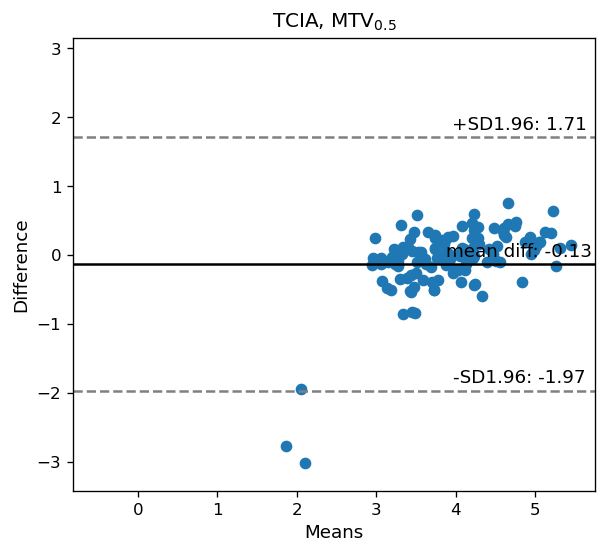

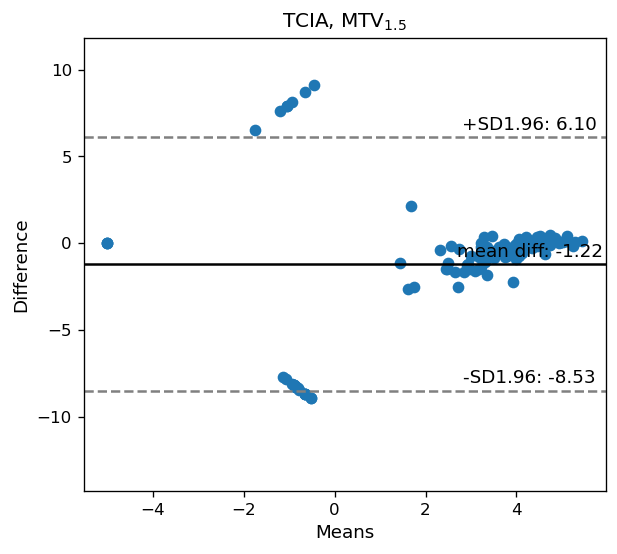

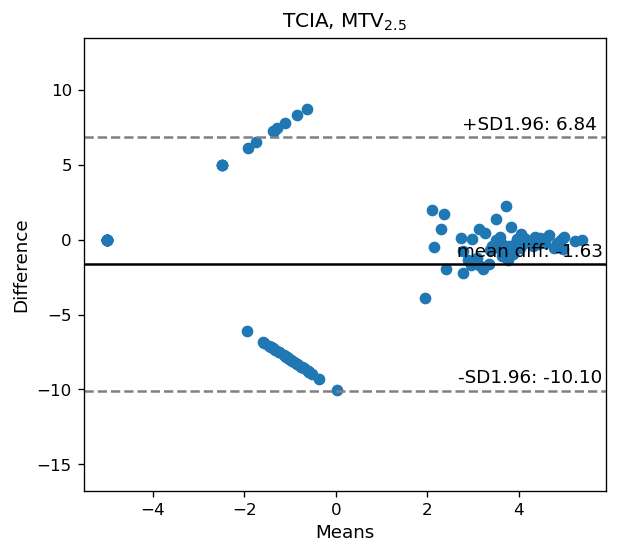

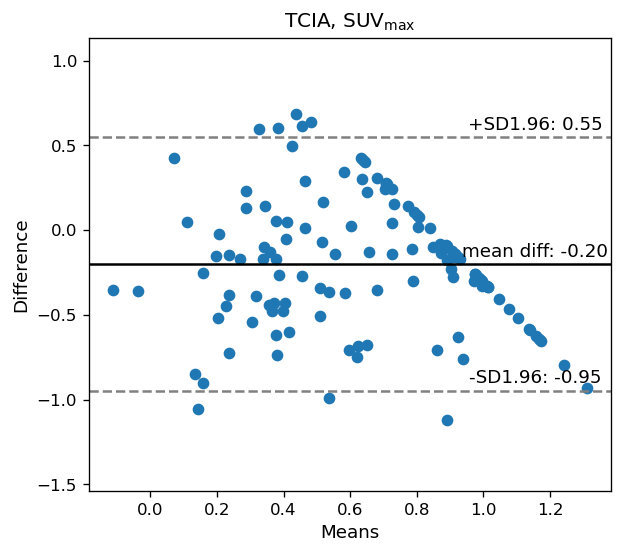

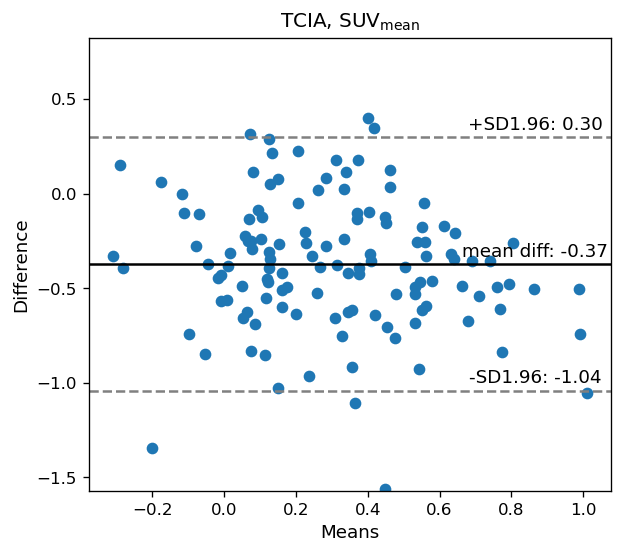

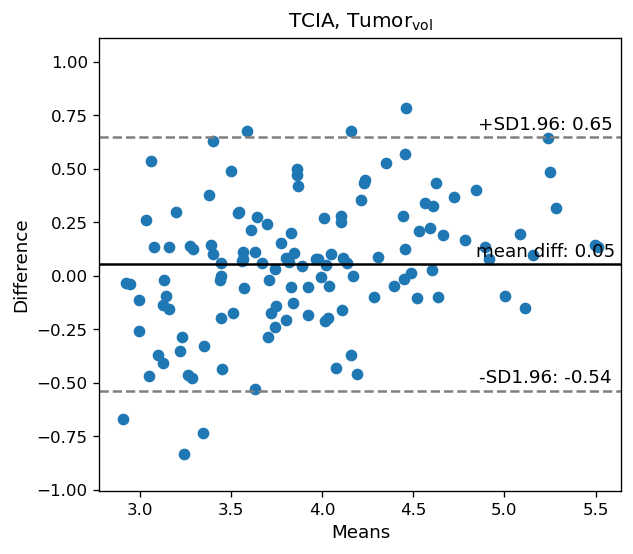

(0.05442235274875671,
 0.30223790422617103,
 array([3.12523581, 3.22850344, 3.10129687, 3.38045697, 4.19278938,
        5.49842347, 4.05030739, 5.00332609, 3.57253661, 3.22273739,
        3.74383191, 3.61108495, 4.2275756 , 3.3915258 , 2.94517052,
        3.12919958, 3.44704791, 3.83092221, 3.4007028 , 3.13166415,
        4.01339991, 4.66009338, 4.1043889 , 4.91348781, 4.28196213,
        5.2375293 , 3.74207538, 3.70172717, 3.15932498, 5.08517615,
        3.40033688, 3.8594293 , 4.7218245 , 5.11135616, 3.67160322,
        2.99767135, 5.15833965, 3.44785795, 4.45548845, 4.16079784,
        4.45364232, 4.15964713, 3.27504062, 3.9241923 , 3.55865473,
        4.16739666, 3.54121074, 4.62311279, 4.10626513, 3.58605345,
        3.77637725, 3.51212722, 4.3053954 , 3.69926747, 3.16129721,
        4.4425104 , 2.92611297, 3.1409689 , 4.59110268, 3.44758974,
        3.80199078, 3.03345799, 4.10100288, 4.78497248, 4.48689509,
        4.21232711, 3.26477432, 3.86687625, 3.56545061, 3.44433513,
    

In [186]:
gtTCIA = pd.read_csv('E:/papers/CT2PET/Survival/TCIA_True_MTV_TLG_pall.csv')
prTCIA = pd.read_csv('E:/papers/CT2PET/Survival/TCIA_Pred_MTV_TLG_pall.csv')
gtTCIA.sort_values('MRN')
prTCIA.sort_values('MRN')
print(gt.columns)


gt = gtTCIA
pr = prTCIA
name = "TCIA, "
title = 'MTV_0.5'
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$MTV_{0.5}$',save_name=name+title)


title = "MTV_1.5"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$MTV_{1.5}$',save_name=name+title)

title = "MTV_2.5"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$MTV_{2.5}$',save_name=name+title)

title = "SUV_max"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$SUV_{max}$',save_name=name+title)

title = "SUV_mean"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$SUV_{mean}$',save_name=name+title)

title = "Tumor_vol"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$Tumor_{vol}$',save_name=name+title)


# x,y = prTCIA["MTV_0.5"],gtTCIA["MTV_0.5"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("MTV_0.5")
# plt.show()

# x,y = prTCIA["MTV_1.5"],gtTCIA["MTV_1.5"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("MTV_1.5")
# plt.show()

# x,y = prTCIA["MTV_2.5"],gtTCIA["MTV_2.5"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("MTV_2.5")
# plt.show()

# x,y = prTCIA["SUV_max"],gtTCIA["SUV_max"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("SUV_max")
# plt.show()

# x,y = prTCIA["SUV_mean"],gtTCIA["SUV_mean"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("SUV_mean")
# plt.show()

# x,y = prTCIA["Tumor_vol"],gtTCIA["Tumor_vol"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("Tumor_vol")
# plt.show()

Index(['MRN', 'MTV_0.5', 'TLG_0.5', 'MTV_1.5', 'TLG_1.5', 'MTV_2.5', 'TLG_2.5',
       'MTV_3.5', 'TLG_3.5', 'SUV_max', 'SUV_mean', 'Tumor_pix', 'Tumor_vol'],
      dtype='object')
Index(['MRN', 'MTV_0.5', 'TLG_0.5', 'MTV_1.5', 'TLG_1.5', 'MTV_2.5', 'TLG_2.5',
       'MTV_3.5', 'TLG_3.5', 'SUV_max', 'SUV_mean', 'Tumor_pix', 'Tumor_vol'],
      dtype='object')


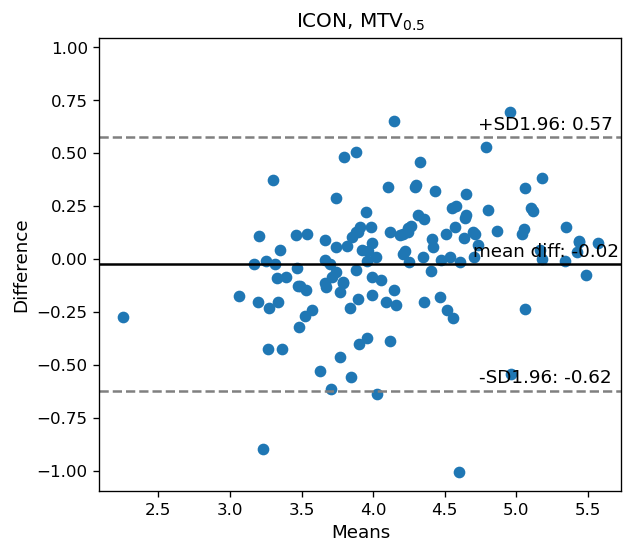

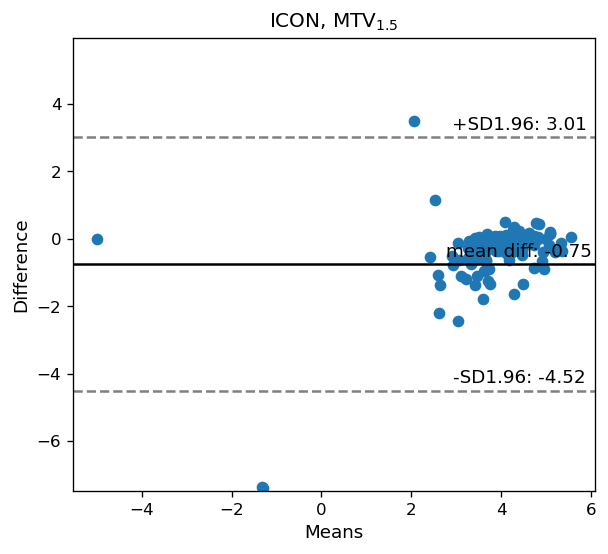

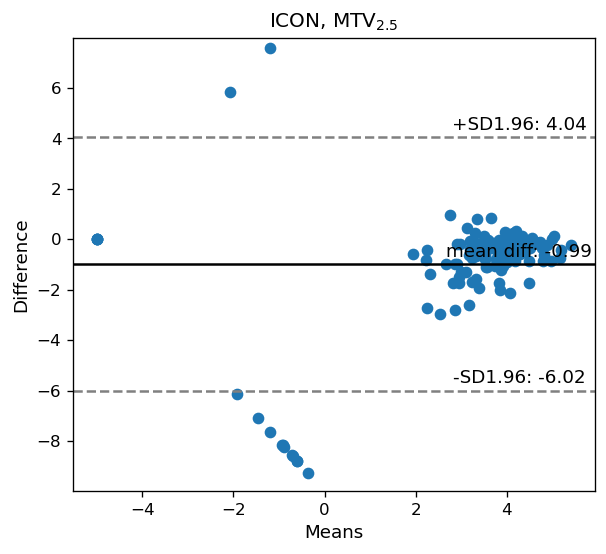

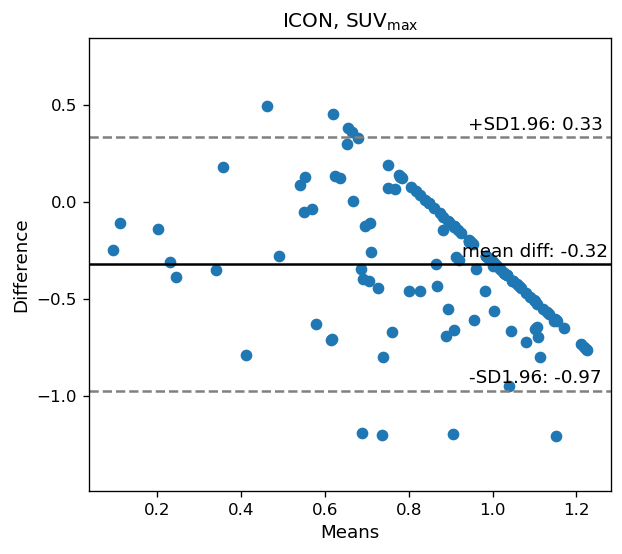

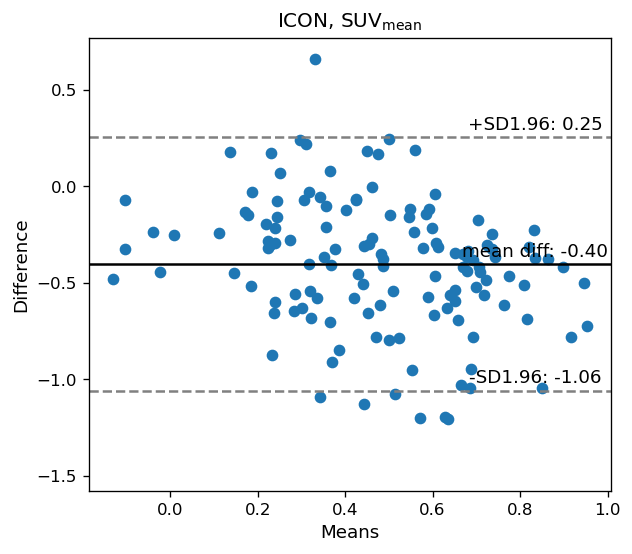

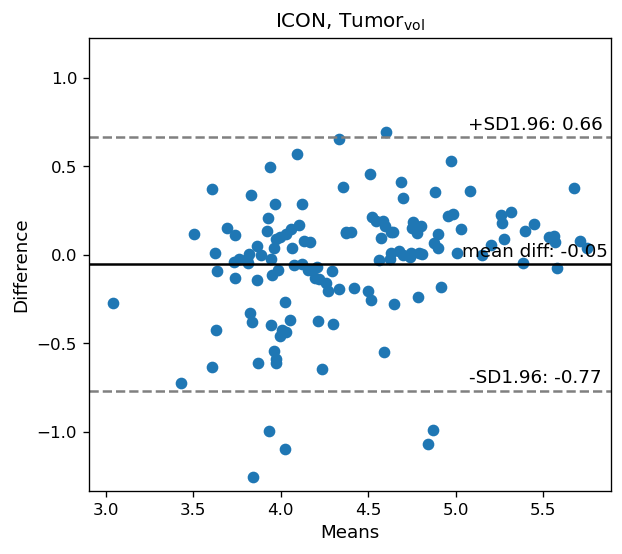

(-0.05193779369141571,
 0.36568097409210043,
 array([3.69647545, 3.80384542, 3.94665164, 4.60501549, 4.37484407,
        3.97268086, 3.86651199, 4.29196203, 3.62503739, 3.60604803,
        4.12299153, 3.9642524 , 3.74020124, 4.33661083, 4.05178382,
        3.94127851, 3.50392853, 4.64368514, 4.25987482, 4.06279856,
        4.02507839, 3.60707338, 5.08321614, 5.71058502, 3.82747557,
        4.00720237, 3.42787193, 4.3744056 , 5.44903739, 4.74660477,
        4.89894788, 3.03942291, 4.15412637, 4.20755776, 4.30218066,
        3.93275314, 4.98603655, 3.73591876, 4.41880663, 4.1768341 ,
        4.35469831, 4.67475458, 4.97598791, 3.99534041, 3.93027067,
        4.21645523, 3.94477468, 4.51507511, 4.63283983, 4.75562981,
        4.84022195, 3.82018222, 4.70043786, 4.63329585, 4.80646322,
        5.67698473, 5.26794219, 4.69890077, 5.53233294, 4.05670709,
        4.90024112, 5.25999877, 5.00875719, 4.56024587, 4.73804703,
        4.12292877, 3.99382977, 3.83687423, 3.63141541, 4.02879115,
   

In [187]:
prICON = pd.read_csv('E:/papers/CT2PET/Survival/ICON_Pred_allMTV.csv')
gtICON = pd.read_csv('E:/papers/CT2PET/Survival/ICON_Truth_allMTV.csv')
gtICON.sort_values('MRN')
prICON.sort_values('MRN')
print(gtICON.columns)
print(prICON.columns)


gt = gtICON
pr = prICON
name = "ICON, "
title = 'MTV_0.5'
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$MTV_{0.5}$',save_name=name+title)


title = "MTV_1.5"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$MTV_{1.5}$',save_name=name+title)

title = "MTV_2.5"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$MTV_{2.5}$',save_name=name+title)

title = "SUV_max"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$SUV_{max}$',save_name=name+title)

title = "SUV_mean"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$SUV_{mean}$',save_name=name+title)

title = "Tumor_vol"
x,y = pr[title],gt[title]
bland_altman_plot(x, y,title=name+'$Tumor_{vol}$',save_name=name+title)

# x,y = prICON["MTV_0.5"],gtICON["MTV_0.5"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("MTV_0.5")
# plt.show()

# x,y = prICON["MTV_1.5"],gtICON["MTV_1.5"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("MTV_1.5")
# plt.show()

# x,y = prICON["MTV_2.5"],gtICON["MTV_2.5"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("MTV_2.5")
# plt.show()

# x,y = prICON["SUV_max"],gtICON["SUV_max"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("SUV_max")
# plt.show()

# x,y = prICON["SUV_mean"],gtICON["SUV_mean"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("SUV_mean")
# plt.show()

# x,y = prICON["Tumor_vol"],gtICON["Tumor_vol"]
# f, ax = plt.subplots(1, figsize = (8,5))
# sm.graphics.mean_diff_plot(x, y, ax = ax)
# plt.title("Tumor_vol")
# plt.show()

In [53]:
from scipy.stats import linregress
import numpy as np
import plotly.graph_objects as go
def bland_altman_plot(data1, data2, data1_name='A', data2_name='B', subgroups=None, plotly_template='none', annotation_offset=0.05, plot_trendline=True, n_sd=1.96,*args, **kwargs):
    data1 = np.asarray( data1 )
    data2 = np.asarray( data2 )
    mean = np.mean( [data1, data2], axis=0 )
    diff = data1 - data2  # Difference between data1 and data2
    md = np.mean( diff )  # Mean of the difference
    sd = np.std( diff, axis=0 )  # Standard deviation of the difference


    fig = go.Figure()

    if plot_trendline:
        slope, intercept, r_value, p_value, std_err = linregress(mean, diff)
        trendline_x = np.linspace(mean.min(), mean.max(), 10)
        fig.add_trace(go.Scatter(x=trendline_x, y=slope*trendline_x + intercept,
                                 name='Trendline',
                                 mode='lines',
                                 line=dict(
                                        width=4,
                                        dash='dot')))
    if subgroups is None:
        fig.add_trace( go.Scatter( x=mean, y=diff, mode='markers', **kwargs))
    else:
        for group_name in np.unique(subgroups):
            group_mask = np.where(np.array(subgroups) == group_name)
            fig.add_trace( go.Scatter(x=mean[group_mask], y=diff[group_mask], mode='markers', name=str(group_name), **kwargs))



    fig.add_shape(
        # Line Horizontal
        type="line",
        xref="paper",
        x0=0,
        y0=md,
        x1=1,
        y1=md,
        line=dict(
            # color="Black",
            width=6,
            dash="dashdot",
        ),
        name=f'Mean {round( md, 2 )}',
    )
    fig.add_shape(
        # borderless Rectangle
        type="rect",
        xref="paper",
        x0=0,
        y0=md - n_sd * sd,
        x1=1,
        y1=md + n_sd * sd,
        line=dict(
            color="SeaGreen",
            width=2,
        ),
        fillcolor="LightSkyBlue",
        opacity=0.4,
        name=f'±{n_sd} Standard Deviations'
    )

    # Edit the layout
    fig.update_layout( title=f'Bland-Altman Plot for {data1_name} and {data2_name}',
                       xaxis_title=f'Average of {data1_name} and {data2_name}',
                       yaxis_title=f'{data1_name} Minus {data2_name}',
                       template=plotly_template,
                       annotations=[dict(
                                        x=1,
                                        y=md,
                                        xref="paper",
                                        yref="y",
                                        text=f"Mean {round(md,2)}",
                                        showarrow=True,
                                        arrowhead=7,
                                        ax=50,
                                        ay=0
                                    ),
                                   dict(
                                       x=1,
                                       y=n_sd*sd + md + annotation_offset,
                                       xref="paper",
                                       yref="y",
                                       text=f"+{n_sd} SD",
                                       showarrow=False,
                                       arrowhead=0,
                                       ax=0,
                                       ay=-20
                                   ),
                                   dict(
                                       x=1,
                                       y=md - n_sd *sd + annotation_offset,
                                       xref="paper",
                                       yref="y",
                                       text=f"-{n_sd} SD",
                                       showarrow=False,
                                       arrowhead=0,
                                       ax=0,
                                       ay=20
                                   ),
                                   dict(
                                       x=1,
                                       y=md + n_sd * sd - annotation_offset,
                                       xref="paper",
                                       yref="y",
                                       text=f"{round(md + n_sd*sd, 2)}",
                                       showarrow=False,
                                       arrowhead=0,
                                       ax=0,
                                       ay=20
                                   ),
                                   dict(
                                       x=1,
                                       y=md - n_sd * sd - annotation_offset,
                                       xref="paper",
                                       yref="y",
                                       text=f"{round(md - n_sd*sd, 2)}",
                                       showarrow=False,
                                       arrowhead=0,
                                       ax=0,
                                       ay=20
                                   )
                               ])
    return fig
bland_altman_plot(m1, m2)

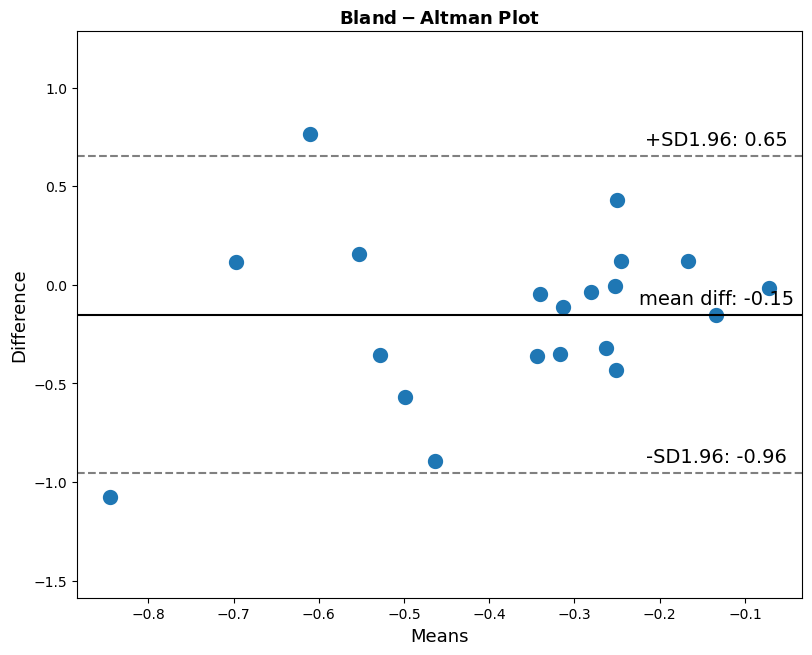

In [105]:
def bland_altman_plot(data1, data2,title="", log=10, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    
    if log==2:
        epsilon = 0.01
        data1 = np.log2(data1+epsilon)
        data2 = np.log2(data2+epsilon)
    elif log==10:
        epsilon = 0.01
        data1 = np.log10(data1+epsilon)
        data2 = np.log10(data2+epsilon)
        
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd
    plt.figure(figsize=(10,7.5), dpi=100)
    plt.scatter(mean, diff, *args, **kwargs, linewidths=5)
    plt.axhline(md,           color='black', linestyle='-')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    
    plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Plot}$", fontsize=13)
    plt.xlabel("Means", fontsize=13)
    plt.ylabel("Difference", fontsize=13)
    plt.ylim(md - 3.5*sd, md + 3.5*sd)

    xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*0.92

    plt.text(xOutPlot, md - 1.76*sd, 
        r'-SD1.96: ' +  "%.2f" % CI_low, 
        ha = "center",
        va = "center",
        fontsize=14)
    plt.text(xOutPlot, md + 2.16*sd, 
        r'+SD1.96: ' + "%.2f" % CI_high, 
        ha = "center",
        va = "center",
        fontsize=14)
    plt.text(xOutPlot, md + 0.20*sd, 
        r'mean diff: ' + "%.2f" % md, 
        ha = "center",
        va = "center",
        fontsize=14)
    plt.subplots_adjust(right=0.85)
    plt.show()
    return md, sd, mean, CI_low, CI_high


md, sd, mean, CI_low, CI_high = bland_altman_plot(m1, m2)
